In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
jaktim_analisis=pd.read_excel('Jaktim_Analisis.xlsx')
jaktim_analisis_lag_4=jaktim_analisis.iloc[0:825:,2:9]
jaktim_analisis_lag_4.head()

,Jumlah Kasus DBD (y),Average of Tavg,Average of Rhavg,Sum of RR,Average of ss,Sum of pengguna krl,Jumlah Kasus DBD lag 4
0,125,28.571429,73.714286,105.1,6.085714,4.692709,125
1,130,28.742857,72.000000,4.8,5.085714,4.412848,113
2,163,27.600000,74.857143,2.8,6.328571,4.266629,106
3,199,26.771429,81.428571,0.6,2.930952,4.089555,118
4,223,25.900000,83.285714,387.7,1.404762,3.711553,125


In [7]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jaktim_analisis_lag_4))
train = jaktim_analisis_lag_4[:split_point]
test = jaktim_analisis_lag_4[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

n_estimators = range(1, 823,10)
max_depth = range(1, 101)
min_samples_split = range(2, 14)
min_samples_leaf = range(1, 7)
max_features = [None, 'sqrt']
bootstrap = [True]

total_iterations = (len(n_estimators) * len(max_depth) * 
                    len(min_samples_split) * len(min_samples_leaf) * 
                    len(max_features) * len(bootstrap))

best_params = {}
best_r2_train = float("-inf")
best_r2_test = float("-inf")
best_s = float("-inf")
k = 0

# DataFrame untuk menyimpan hasil tuning
results = pd.DataFrame(columns=[
    'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',
    'max_features', 'bootstrap', 'R2_train', 'R2_test', 'R2_total'
])

# Modifikasi loop tuning
for n in n_estimators:
    for depth in max_depth:
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                for feature in max_features:
                    for boot in bootstrap:
                        
                        # Clear output and print progress
                        k += 1
                        clear_output(wait=True)
                        
                        percent_complete = (k / total_iterations) * 100
                        print(f"Progress: {k}/{total_iterations} iterations completed ({percent_complete:.2f}%)")
                        
                        # Buat model dan fit ke data
                        model = RandomForestRegressor(
                            n_estimators=n,
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            max_features=feature,
                            bootstrap=boot,
                            n_jobs=-1,
                            random_state=42
                        )
                        model.fit(X_train, y_train)

                        # Prediksi dan hitung R^2
                        y_train_pred = model.predict(X_train)
                        y_test_pred = model.predict(X_test)
                        r2_train = r2_score(y_train, y_train_pred)
                        r2_test = r2_score(y_test, y_test_pred)
                        total_r2 = r2_test + r2_train

                        # Simpan hasil ke DataFrame
                        results = pd.concat([results, pd.DataFrame([{
                            'n_estimators': n,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf,
                            'max_features': feature,
                            'bootstrap': boot,
                            'R2_train': r2_train,
                            'R2_test': r2_test,
                            'R2_total': total_r2
                        }])], ignore_index=True)

                        # Perbarui parameter terbaik jika R^2 total lebih tinggi
                        if total_r2 > best_s:
                            best_s = total_r2
                            best_r2_train = r2_train
                            best_r2_test = r2_test
                            best_params = {
                                'n_estimators': n,
                                'max_depth': depth,
                                'min_samples_split': split,
                                'min_samples_leaf': leaf,
                                'max_features': feature,
                                'bootstrap': boot
                            }
                        del model

# Setelah selesai, simpan DataFrame ke file CSV atau langsung gunakan untuk grafik
results.to_csv("tuning_results6.csv", index=False)  # Menyimpan hasil ke file CSV

print("Best Parameters for R² Total:", best_params)
print("Best R² Total:", best_s)
print("Best R² Train:", best_r2_train)
print("Best R² Test:", best_r2_test)

Progress: 1195200/1195200 iterations completed (100.00%)
Best Parameters for R² Total: {'n_estimators': 71, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}
Best R² Total: 1.5473828277286454
Best R² Train: 0.9613249867823848
Best R² Test: 0.5860578409462606


In [3]:
jaktim_analisis=pd.read_excel('Jaktim_Analisis.xlsx')
jaktim_analisis_lag_4=jaktim_analisis.iloc[0:825:,2:9]
jaktim_analisis_lag_4.head()

,Jumlah Kasus DBD (y),Average of Tavg,Average of Rhavg,Sum of RR,Average of ss,Sum of pengguna krl,Jumlah Kasus DBD lag 4
0,125,28.571429,73.714286,105.1,6.085714,4.692709,125
1,130,28.742857,72.000000,4.8,5.085714,4.412848,113
2,163,27.600000,74.857143,2.8,6.328571,4.266629,106
3,199,26.771429,81.428571,0.6,2.930952,4.089555,118
4,223,25.900000,83.285714,387.7,1.404762,3.711553,125


In [4]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jaktim_analisis_lag_4))
train = jaktim_analisis_lag_4[:split_point]
test = jaktim_analisis_lag_4[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

model=RandomForestRegressor(n_estimators=71,max_depth=17,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',bootstrap=True,random_state=42)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)
print(total_r2)

0.9613249867823848
0.5860578409462606
1.5473828277286454


In [3]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jaktim_analisis_lag_4))
train = jaktim_analisis_lag_4[:split_point]
test = jaktim_analisis_lag_4[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)
print(total_r2)

0.9616709543585261
0.48785079359864425
1.4495217479571703


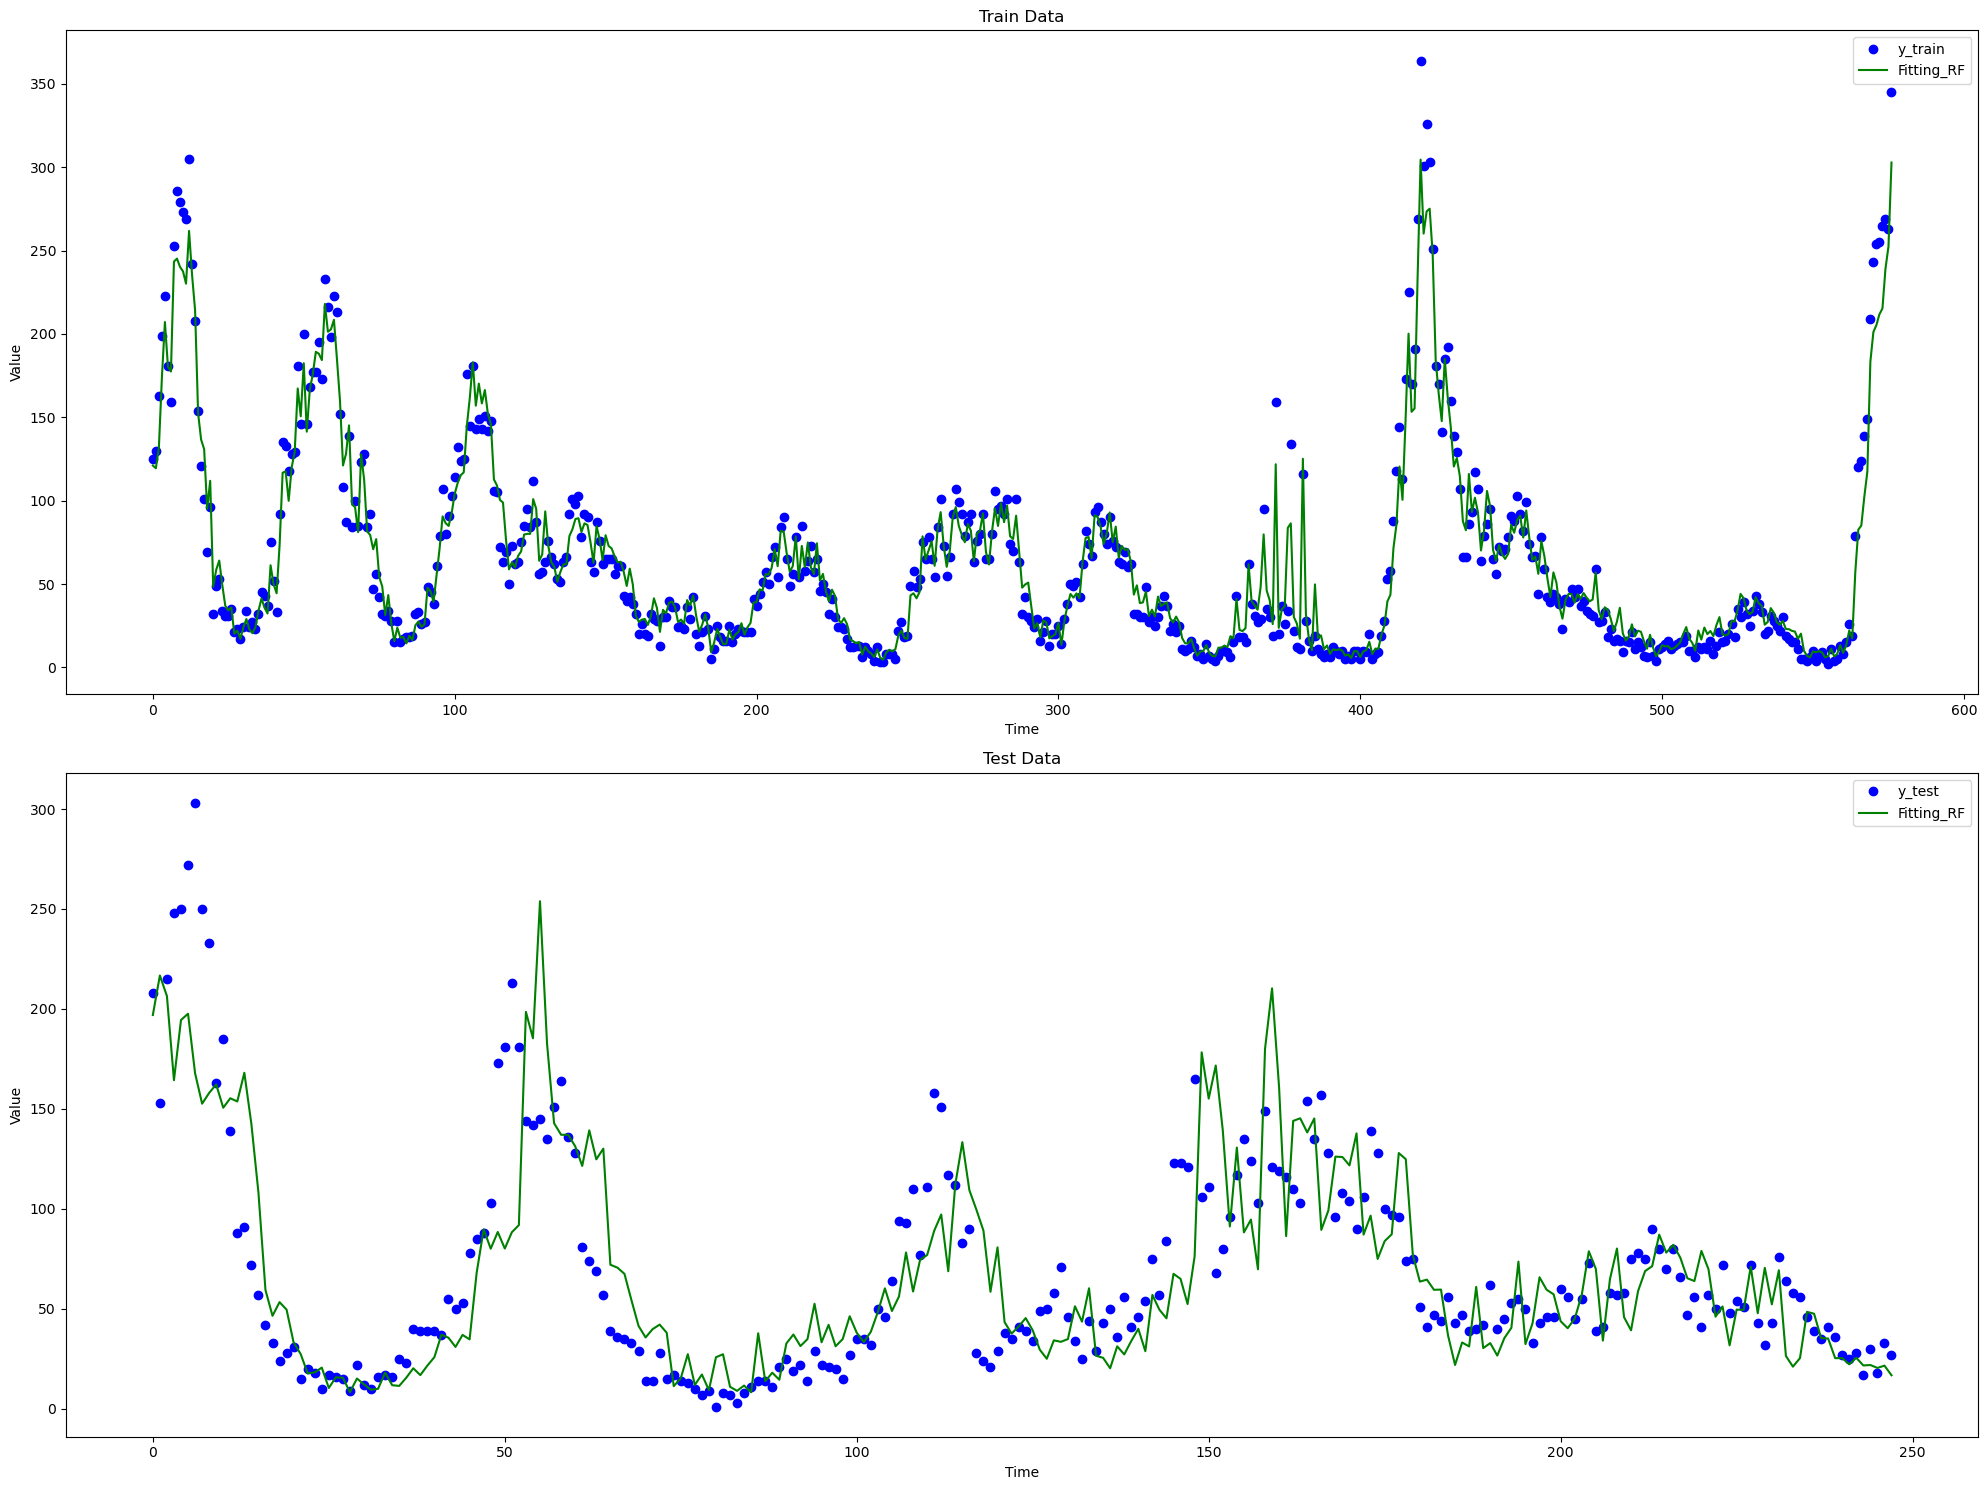

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Asumsi data Anda
time_train = np.arange(0, 577, 1)
time_test = np.arange(0, 248, 1)

# Ukuran figure dan subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 15))  # 2 baris, 1 kolom

time_actual = np.arange(0, 577 + 248, 1)  # Gabungan train dan test
y_actual = np.concatenate([y_train, y_test])  # Gabungkan data train dan test

# Plot pertama: Data train
axes[0].plot(time_train, y_train, 'bo', label='y_train')
axes[0].plot(time_train, y_train_pred, 'g-', label='Fitting_RF')
axes[0].set_title("Train Data")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Value")
axes[0].legend()

# Plot kedua: Data test
axes[1].plot(time_test, y_test, 'bo', label='y_test')
axes[1].plot(time_test, y_test_pred, 'g-', label='Fitting_RF')
axes[1].set_title("Test Data")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Value")
axes[1].legend()

# Mengatur tata letak agar tidak overlap
plt.tight_layout()

plt.savefig('Jaktim_RF', dpi=300, bbox_inches='tight')

# Menampilkan plot
plt.show()


In [5]:
jaktim_copula=pd.read_excel("Jaktim_Copula.xlsx")
jaktim_copula_2=jaktim_copula.iloc[0:825:,2:10]
jaktim_copula_2.head()


,Jumlah Kasus DBD (y),Average of Tavg,Average of Rhavg,Sum of RR,Average of ss,Sum of pengguna krl,Jumlah Kasus DBD lag 4,Jumlah_Kasus_Selatan
0,125,28.571429,73.714286,105.1,6.085714,4.692709,125,114
1,130,28.742857,72.000000,4.8,5.085714,4.412848,113,120
2,163,27.600000,74.857143,2.8,6.328571,4.266629,106,108
3,199,26.771429,81.428571,0.6,2.930952,4.089555,118,140
4,223,25.900000,83.285714,387.7,1.404762,3.711553,125,157


In [3]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jaktim_copula_2))
train = jaktim_copula_2[:split_point]
test = jaktim_copula_2[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

model=RandomForestRegressor(n_estimators=71,max_depth=17,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',bootstrap=True,random_state=42)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred_2 = model.predict(X_train)
y_test_pred_2 = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred_2)
r2_test = r2_score(y_test, y_test_pred_2)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)
print(total_r2)


0.9801115148853264
0.7615689807790023
1.7416804956643288


In [6]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jaktim_copula_2))
train = jaktim_copula_2[:split_point]
test = jaktim_copula_2[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

model=RandomForestRegressor(n_estimators=281,max_depth=18,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',bootstrap=True,random_state=42)
model.fit(X_train, y_train)
# Prediksi dan hitung R^2
y_train_pred_2 = model.predict(X_train)
y_test_pred_2 = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred_2)
r2_test = r2_score(y_test, y_test_pred_2)
total_r2 = r2_test + r2_train

print(r2_train)
print(r2_test)
print(total_r2)


0.9816002081323164
0.7807078841309825
1.7623080922632988


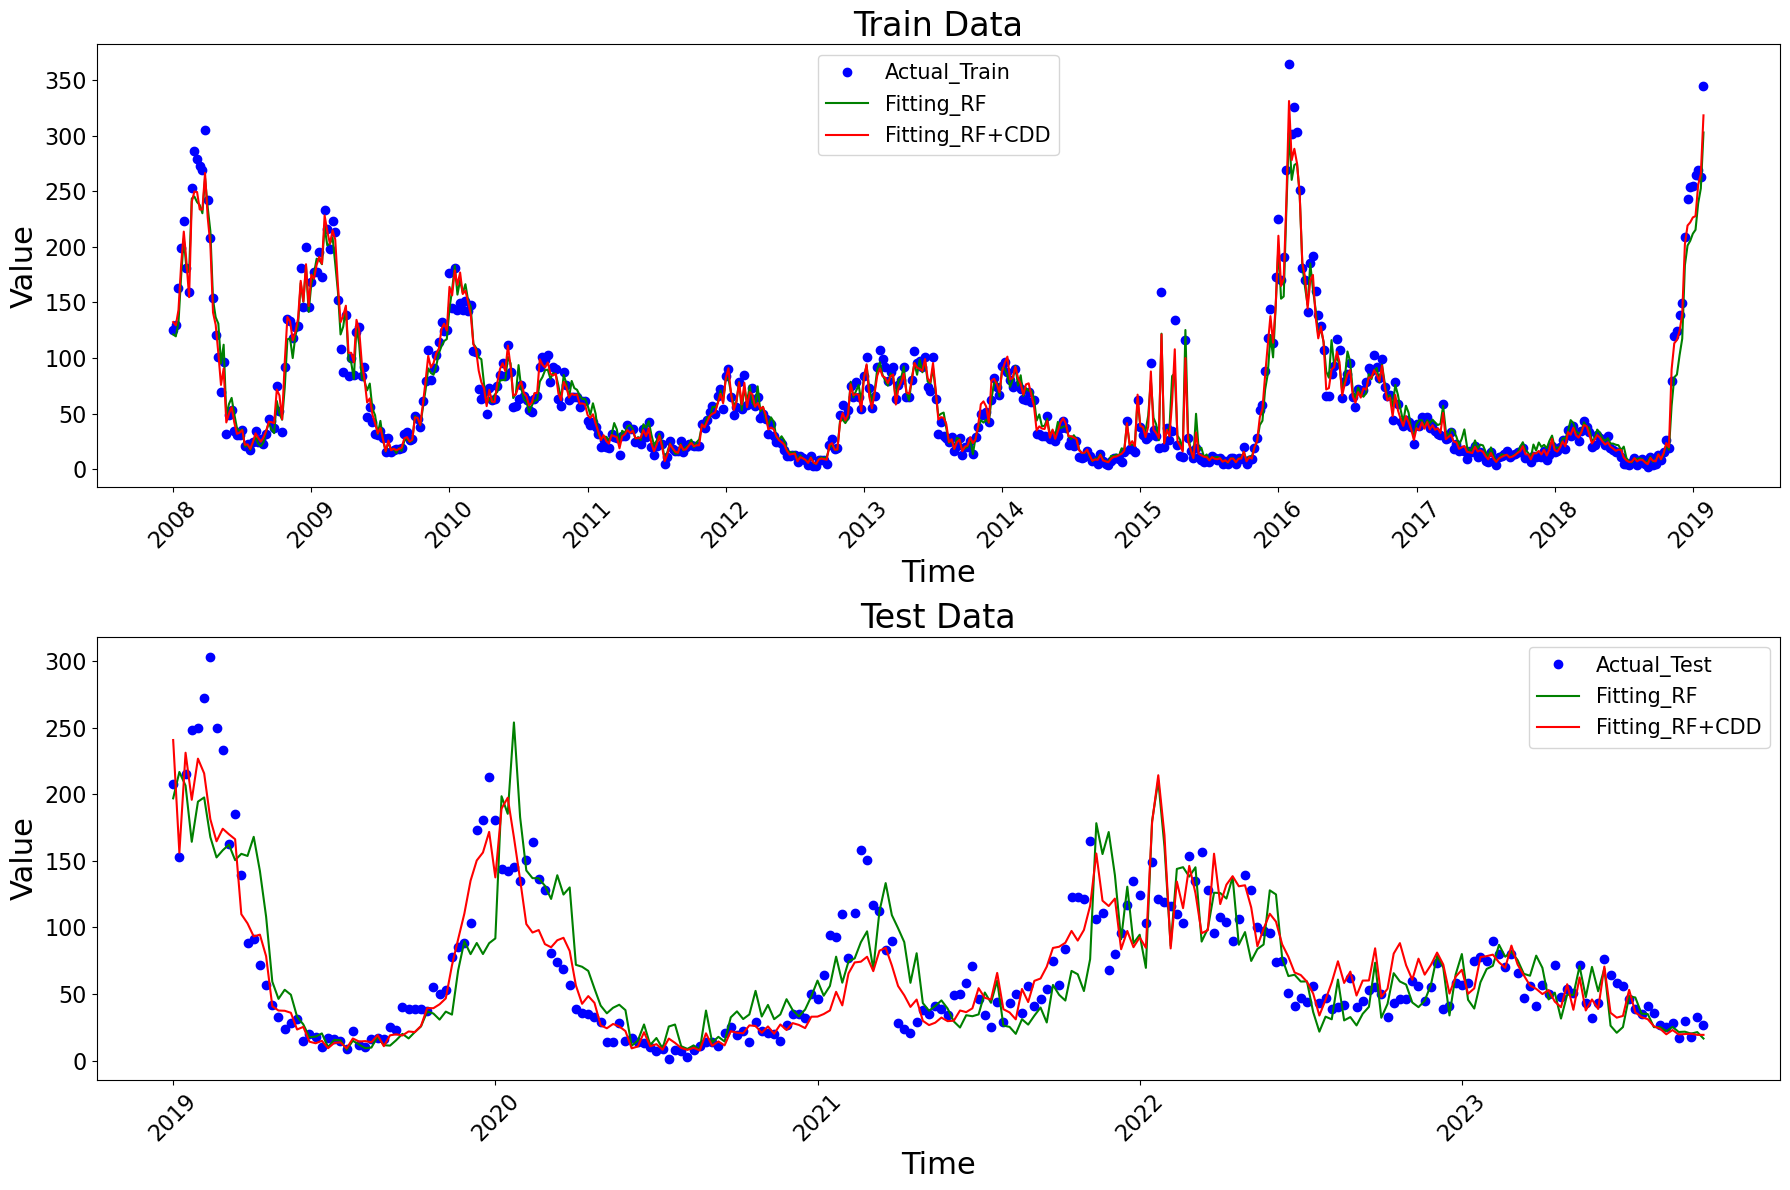

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

tanggal=jaktim_analisis.iloc[0:825:,1]
tanggal.tail()

# Total panjang yang diinginkan
train_length = 577
test_length = 248

# Membagi menjadi train dan test
time_train = tanggal[:train_length]
time_test = tanggal[train_length:train_length + test_length]
# Pastikan time_train dan time_test dalam format string
time_train = time_train.astype(str)
time_test = time_test.astype(str)

# Ekstrak tahun dari data time_train dan time_test (contoh format: "26/11/2023 - 02/12/2023")
time_train_years = [t.split("/")[-1].split(" - ")[-1] for t in time_train]
time_test_years = [t.split("/")[-1].split(" - ")[-1] for t in time_test]

# Plot data
fig, axes = plt.subplots(2, 1, figsize=(18, 12))  # 2 baris, 1 kolom

# Plot pertama: Data train
axes[0].plot(time_train, y_train, 'bo', label='Actual_Train')
axes[0].plot(time_train, y_train_pred, 'g-', label='Fitting_RF')
axes[0].plot(time_train, y_train_pred_2, 'r-', label='Fitting_RF+CDD')
axes[0].set_title("Train Data", fontsize=24)
axes[0].set_xlabel("Time", fontsize=22)
axes[0].set_ylabel("Value", fontsize=22)
axes[0].legend(fontsize=15)

# Atur ticks untuk data train
xticks_train = np.arange(0, len(time_train), 52)  # Setiap 52 minggu
axes[0].set_xticks(xticks_train)
axes[0].set_xticklabels([time_train_years[i] for i in xticks_train])

# Plot kedua: Data test
axes[1].plot(time_test, y_test, 'bo', label='Actual_Test')
axes[1].plot(time_test, y_test_pred, 'g-', label='Fitting_RF')
axes[1].plot(time_test, y_test_pred_2, 'r-', label='Fitting_RF+CDD')
axes[1].set_title("Test Data", fontsize=24)
axes[1].set_xlabel("Time", fontsize=22)
axes[1].set_ylabel("Value", fontsize=22)
axes[1].legend(fontsize=15)

# Atur ticks untuk data test
xticks_test = np.arange(0, len(time_test), 52)  # Setiap 52 minggu
axes[1].set_xticks(xticks_test)
axes[1].set_xticklabels([time_test_years[i] for i in xticks_test])

axes[0].tick_params(axis='x', rotation=45,labelsize=16)
axes[1].tick_params(axis='x', rotation=45,labelsize=16)

axes[0].tick_params(axis='y',labelsize=16)
axes[1].tick_params(axis='y',labelsize=16)

# Mengatur tata letak agar tidak overlap
plt.tight_layout()

# Menyimpan plot
plt.savefig('Jaktim_RF_CDD', dpi=300, bbox_inches='tight')
with PdfPages('Jaktim_RF_CDD.pdf') as pdf:
    pdf.savefig()  # Save the current figure to the PDF

# Menampilkan plot
plt.show()


In [4]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

split_point = int(0.7 * len(jaktim_copula_2))
train = jaktim_copula_2[:split_point]
test = jaktim_copula_2[split_point:]
X_train = train.drop('Jumlah Kasus DBD (y)', axis=1)
y_train = train['Jumlah Kasus DBD (y)']
X_test = test.drop('Jumlah Kasus DBD (y)', axis=1)
y_test = test['Jumlah Kasus DBD (y)']

n_estimators = range(1, 823, 10)
max_depth = range(1, 101)
min_samples_split = range(2, 14)
min_samples_leaf = range(1, 7)
max_features = [None, 'sqrt']
bootstrap = [True]

total_iterations = (len(n_estimators) * len(max_depth) * 
                    len(min_samples_split) * len(min_samples_leaf) * 
                    len(max_features) * len(bootstrap))

best_params = {}
best_r2_train = float("-inf")
best_r2_test = float("-inf")
best_s = float("-inf")
k = 0

# DataFrame untuk menyimpan hasil tuning
results = pd.DataFrame(columns=[
    'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',
    'max_features', 'bootstrap', 'R2_train', 'R2_test', 'R2_total'
])

# Modifikasi loop tuning
for n in n_estimators:
    for depth in max_depth:
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                for feature in max_features:
                    for boot in bootstrap:
                        
                        # Clear output and print progress
                        k += 1
                        clear_output(wait=True)
                        
                        percent_complete = (k / total_iterations) * 100
                        print(f"Progress: {k}/{total_iterations} iterations completed ({percent_complete:.2f}%)")
                        
                        # Buat model dan fit ke data
                        model = RandomForestRegressor(
                            n_estimators=n,
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            max_features=feature,
                            bootstrap=boot,
                            n_jobs=-1,
                            random_state=42
                        )
                        model.fit(X_train, y_train)

                        # Prediksi dan hitung R^2
                        y_train_pred = model.predict(X_train)
                        y_test_pred = model.predict(X_test)
                        r2_train = r2_score(y_train, y_train_pred)
                        r2_test = r2_score(y_test, y_test_pred)
                        total_r2 = r2_test + r2_train

                        # Simpan hasil ke DataFrame
                        results = pd.concat([results, pd.DataFrame([{
                            'n_estimators': n,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf,
                            'max_features': feature,
                            'bootstrap': boot,
                            'R2_train': r2_train,
                            'R2_test': r2_test,
                            'R2_total': total_r2
                        }])], ignore_index=True)

                        # Perbarui parameter terbaik jika R^2 total lebih tinggi
                        if total_r2 > best_s:
                            best_s = total_r2
                            best_r2_train = r2_train
                            best_r2_test = r2_test
                            best_params = {
                                'n_estimators': n,
                                'max_depth': depth,
                                'min_samples_split': split,
                                'min_samples_leaf': leaf,
                                'max_features': feature,
                                'bootstrap': boot
                            }
                        del model

# Setelah selesai, simpan DataFrame ke file CSV atau langsung gunakan untuk grafik
results.to_csv("tuning_results3.csv", index=False)  # Menyimpan hasil ke file CSV

print("Best Parameters for R² Total:", best_params)
print("Best R² Total:", best_s)
print("Best R² Train:", best_r2_train)
print("Best R² Test:", best_r2_test)

Progress: 54/1195200 iterations completed (0.00%)


KeyboardInterrupt: 